# Расчет проводимости трубопроводов с помощью МУК

In [1]:
import os
import math
import numpy  as np
import pandas as pd
from graph import Graph #собственный класс для графиков
from matplotlib  import pyplot as plt
from rectangular import Rectangular, elementary

## Тестирование

### Проверка элементарного УК

In [2]:
def angles(num = 5):
    #зависимость элементарного УК от угла
    c_i = [1/2, 0, 1/2]
    c_j = [1/2, 1, 1/2]
    n_i = [0,1,0]
    angle_ar = np.linspace(0,2,num)*math.pi
    
    x, y = np.sin(angle_ar), np.cos(angle_ar)
    Y    = []
    for i in range(num):
        n_j = [x[i], y[i], 0]
        X   = angle_ar/math.pi
        Y.append(elementary(c_i,c_j,n_i,n_j,0.05))
    
    graph = Graph()
    graph.customize_graph("Зависимость  элем-го УК от угла", "Угол, rad/pi")
    plt.plot(X,Y)
    graph.save("angle.png", "tests")
    return

def distance(num = 5):
    #зависимость  элем-го УК от расстояния
    c_i  = [1/2, 0, 1/2]
    n_i  = [0,1,0]
    n_j  = [np.sin(math.pi/4), np.cos(math.pi/4),0]
    dist = np.linspace(0.5,10,num)
    Y    = []
    for d in dist:
        c_j = [1/2, d, 1/2]
        Y.append(elementary(c_i,c_j,n_i,n_j,0.05))
        
    graph = Graph()
    graph.customize_graph("Зависимость  элем-го УК от расстояния", "Расстояние")
    plt.plot(dist,Y)
    graph.save("distance.png", "tests")
    return

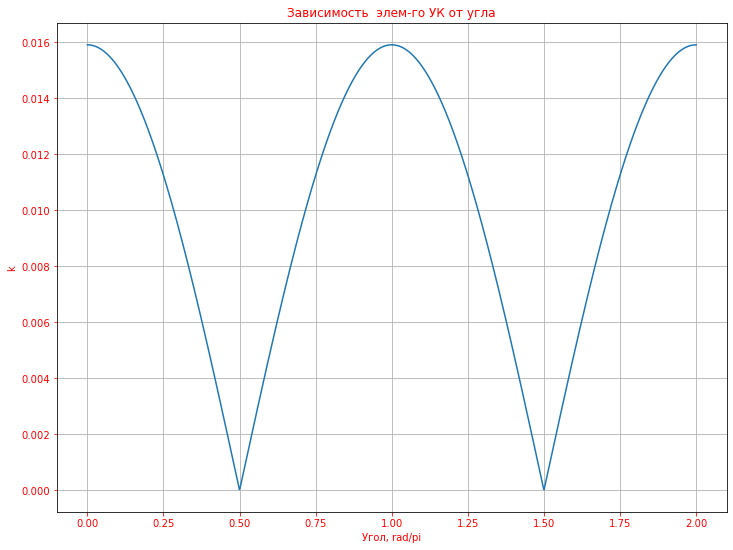

In [3]:
angles(1002)

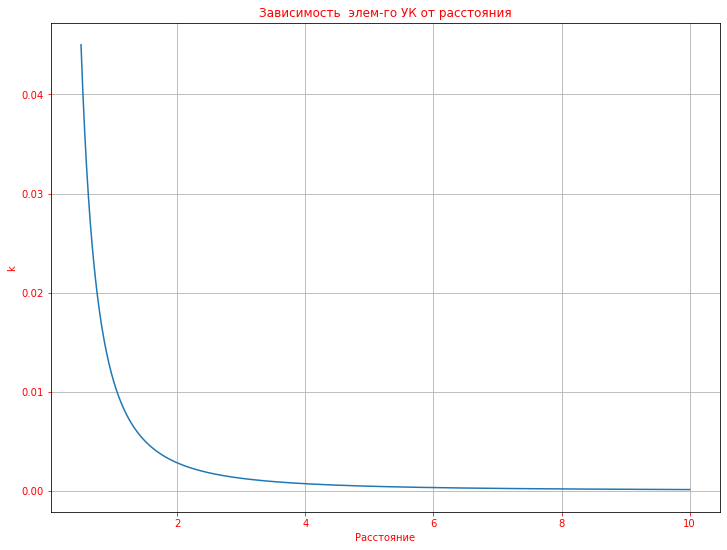

In [4]:
distance(1000)

### Проверка УК

In [5]:
def table(phi):
    #вывод всех пар УК.
    #phi_ij находится в i-й строке, j-м столбце.
    phi = np.transpose(phi)
    my_table = pd.DataFrame({"0" : phi[0]})
    for i in range(1,len(phi)):
        my_table[str(i)] = phi[i]
    return my_table

def isolation(phi):
    #свойство замкнутости.
    print("\n")
    for i in range(1,len(phi)):
        sum = 0
        for j in range(1, len(phi[i])):
            sum += phi[i][j]
        print("Сумма для " + str(i) + "-го эмиттера равна", round(sum,5))
    return

def mutuality(t):
    #свойство взаимности.
    phi = t.matrix()
    for i in range(1, len(phi)):
        for j in range(1, len(phi[i])):
            if round(phi[i][j] * t.areas[i-1],5) != round(phi[j][i] * t.areas[j-1],5):
                print("Свойство взаимности не выполнено для i =", i, "и j =", j)
    print("\n")   
    return

def additivity(t):
    #свойство аддитивности.
    phi = t.matrix()
    for i in range(1,len(phi)):
        for j in range(1,len(phi[i])):
            if i == j:
                break
            new_phi = t.check_add(i,j)
            if round(new_phi,5) != round(phi[i][j],5):
                print("Свойство аддитивности не выполнено для i=", i, "и для j=", j)
    print("\n")
    return 

In [6]:
tube_1, tube_2 = Rectangular(1,1,1), Rectangular(1,5,1)
#cell = 0.01
phi_1 = tube_1.matrix()

In [7]:
print("phi для a = 1, b = 1, L = 1:")
display(table(phi_1))
isolation(phi_1)

phi для a = 1, b = 1, L = 1:


,0,1,2,3,4,5,6
0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.0,0.00000,0.20043,0.21344,0.21344,0.21344,0.21344
2,0.0,0.20043,0.00000,0.21344,0.21344,0.21344,0.21344
3,0.0,0.21344,0.21344,0.00000,0.21344,0.20043,0.21344
4,0.0,0.21344,0.21344,0.21344,0.00000,0.21344,0.20043
5,0.0,0.21344,0.21344,0.20043,0.21344,0.00000,0.21344
6,0.0,0.21344,0.21344,0.21344,0.20043,0.21344,0.00000




Сумма для 1-го эмиттера равна 1.05419
Сумма для 2-го эмиттера равна 1.05419
Сумма для 3-го эмиттера равна 1.05419
Сумма для 4-го эмиттера равна 1.05419
Сумма для 5-го эмиттера равна 1.05419
Сумма для 6-го эмиттера равна 1.05419


In [8]:
print("phi для a = 1, b = 5, L = 1:")
phi_2 = tube_2.matrix()
display(table(phi_2))
isolation(phi_2)

phi для a = 1, b = 5, L = 1:


,0,1,2,3,4,5,6
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.359737,0.052068,0.284334,0.052068,0.284334
2,0.0,0.359737,0.000000,0.052068,0.284334,0.052068,0.284334
3,0.0,0.260341,0.260341,0.000000,0.260341,0.012407,0.260341
4,0.0,0.284334,0.284334,0.052068,0.000000,0.052068,0.359737
5,0.0,0.260341,0.260341,0.012407,0.260341,0.000000,0.260341
6,0.0,0.284334,0.284334,0.052068,0.359737,0.052068,0.000000




Сумма для 1-го эмиттера равна 1.03254
Сумма для 2-го эмиттера равна 1.03254
Сумма для 3-го эмиттера равна 1.05377
Сумма для 4-го эмиттера равна 1.03254
Сумма для 5-го эмиттера равна 1.05377
Сумма для 6-го эмиттера равна 1.03254


In [9]:
mutuality(tube_1)
mutuality(tube_2)

In [10]:
additivity(tube_1)
additivity(tube_2)

### Проверка коэффициента Клаузинга

In [11]:
def test_1(t):
    #меньше ли 1.
    print("Коэффициент Клаузинга меньше единицы", t.clausing() <= 1)
    print("\n")
    return

def test_0(t):
    #больше ли 0.
    print("Коэффициент Клаузинга больше нуля", t.clausing() >= 0)
    print("\n")
    return

In [12]:
test_1(tube_1)
test_1(tube_2)

Коэффициент Клаузинга меньше единицы True


Коэффициент Клаузинга меньше единицы True




In [13]:
test_0(tube_1)
test_0(tube_2)

Коэффициент Клаузинга больше нуля True


Коэффициент Клаузинга больше нуля True




### Графики

In [18]:
#ф-ция строит кривую на графике
#и сохраняет его
def lines(x, k, filename = "", dirname = ""):
    plt.scatter(x, k, marker="o")
    plt.plot(x, k)
    
    plt.legend()
    Graph().save(filename, dirname)
    return

#ф-ция строит, называет,
#выводит и сохраняет 2 графика
#для разных прямоугольных сечений
def draw_L(b):
    x = range(1,8)
    k = [Rectangular(1,b,element).clausing() for element in x]
    
    graph = Graph()
    graph.customize_graph("Проводимость в прямоугольном сечении при b = " + str(b), "L")
    lines(x, k, "b" + str(b) + ".png", "rectangular")
    plt.show()
    return

No handles with labels found to put in legend.


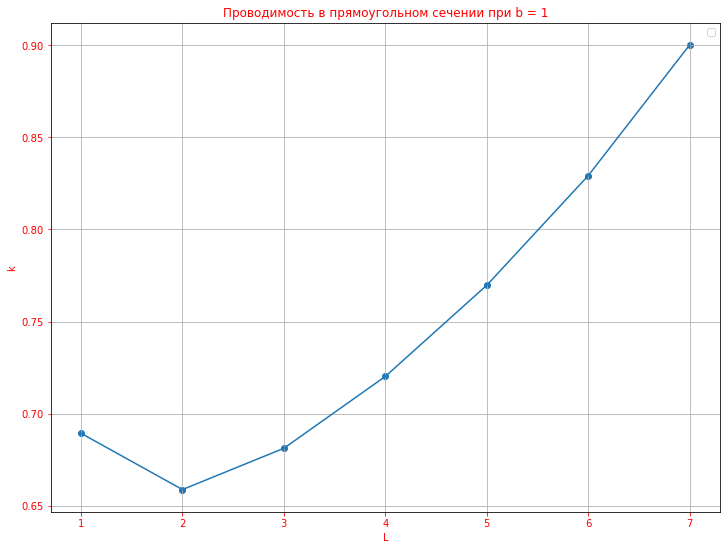

In [19]:
draw_L(1)

No handles with labels found to put in legend.


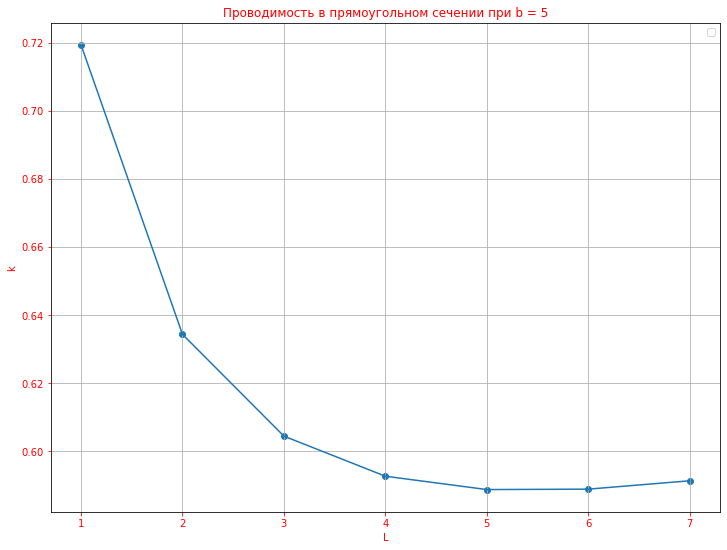

In [26]:
draw_L(5)

In [23]:
def draw_cells(b):
    x = np.array([0.05, 0.1, 0.2, 0.25, 0.5])**2
    k = [Rectangular(1,b,1,cell).clausing() for cell in x]
    
    graph = Graph()
    graph.customize_graph("Проводимость в прямоугольном сечении при b = " + str(b), "Площадь ячейки")
    lines(x, k, "b" + str(b) + "cells.png", "rectangular")
    plt.show()
    return

No handles with labels found to put in legend.


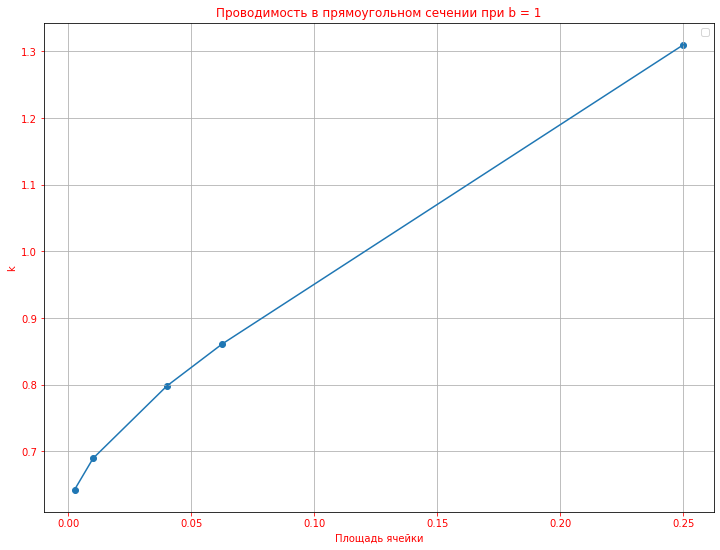

In [24]:
draw_cells(1)

No handles with labels found to put in legend.


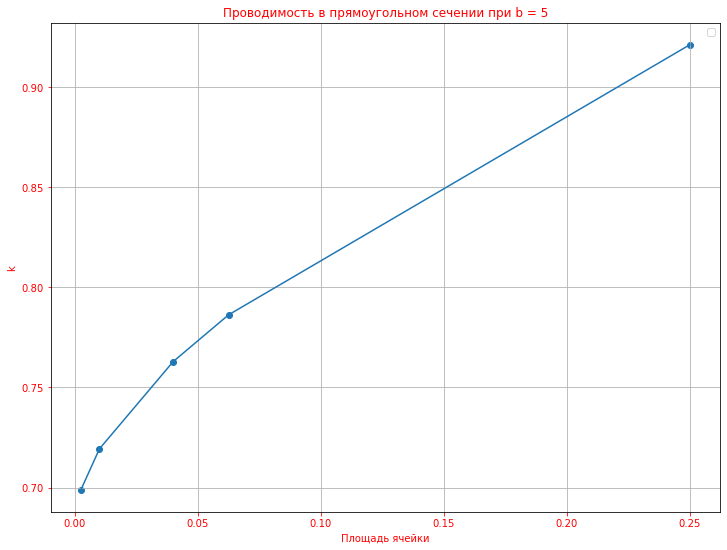

In [25]:
draw_cells(5)